# Итоговая работа.

In [164]:
import matplotlib.pyplot as plt

import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

import seaborn as sns
sns.set()
from pylab import rcParams
rcParams['figure.figsize']=15,10

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [165]:
import sympy as sym
x = sym.Symbol('x')

In [166]:
x0 = 1
y = sym.tan(sym.sin(x)+sym.cos(2*x+3))**2
y

tan(sin(x) + cos(2*x + 3))**2

In [167]:
answer = sym.diff(y)
answer

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [168]:
num_answer = answer.evalf(3, subs={x:x0})
num_answer

55.4

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 300.0)

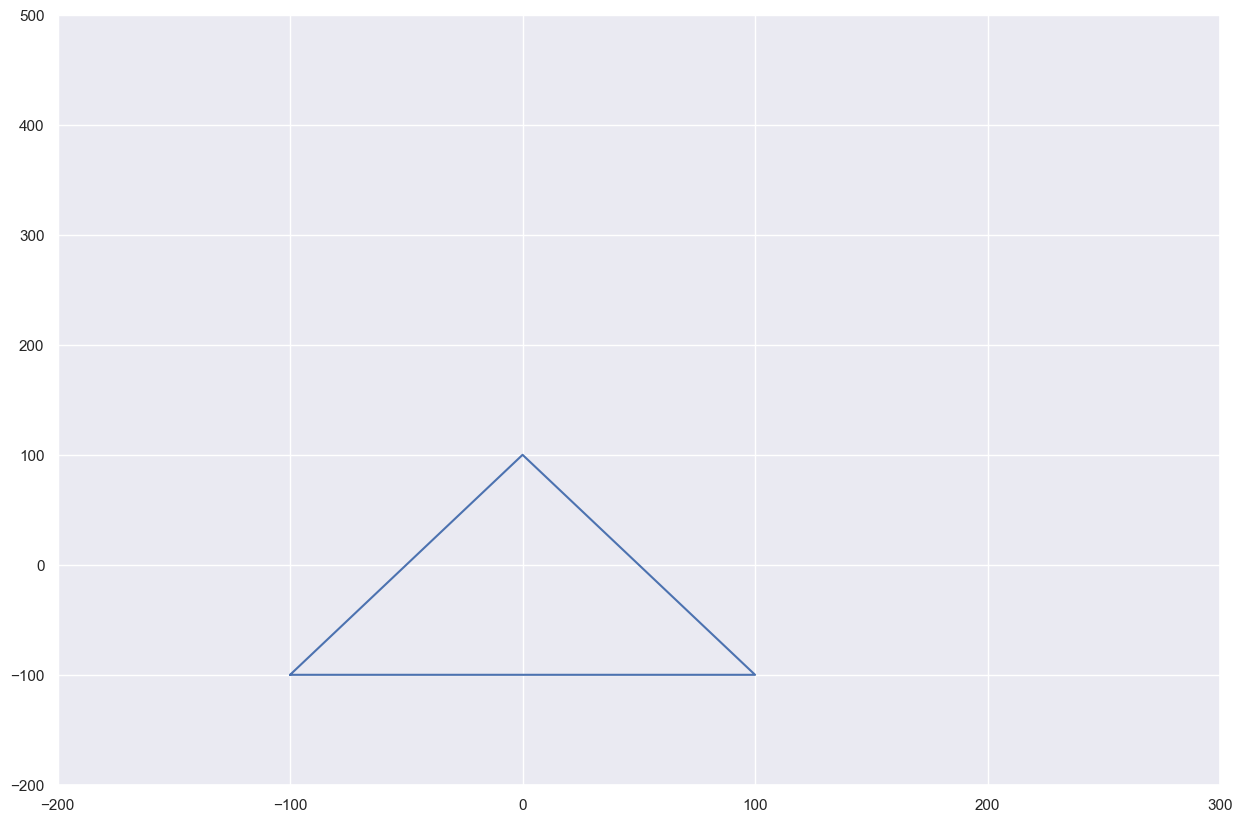

In [169]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 500])
plt.xlim([-200, 300]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


In [170]:
scale_mat = np.eye(3)
scale_mat[0,0] = 0.5
scale_mat[1,1] = 1.2

In [171]:
scale_mat

array([[0.5, 0. , 0. ],
       [0. , 1.2, 0. ],
       [0. , 0. , 1. ]])

In [172]:
move_mat = np.eye(3)
move_mat[2,0] = 200
move_mat[2,1] = 300

In [173]:
move_mat

array([[  1.,   0.,   0.],
       [  0.,   1.,   0.],
       [200., 300.,   1.]])

In [174]:
A = np.dot(A,scale_mat)
A = np.dot(A,move_mat)

(-200.0, 400.0)

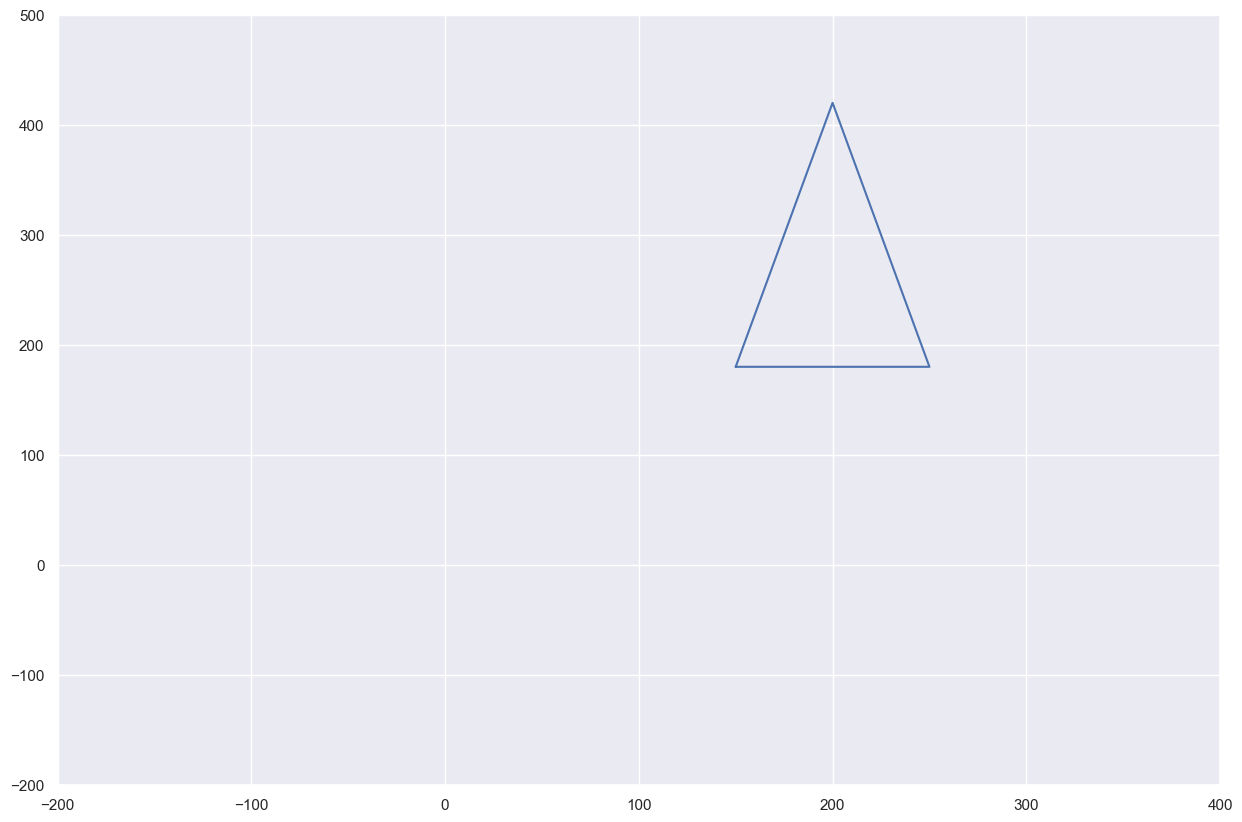

In [175]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 500])
plt.xlim([-200, 400])

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [176]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [177]:
vector1, vector2 = np.linalg.eig(m)[1]
eig_val = np.linalg.eig(m)[0]
f'eigen vector 1 is {vector1/-0.89442719}, and eigen vector 2 is {vector2/0.4472136} and eigen values is {eig_val}'

'eigen vector 1 is [-1.  1.], and eigen vector 2 is [0.99999999 0.99999999] and eigen values is [ 3. -1.]'

Или так

(-4.0, 4.0)

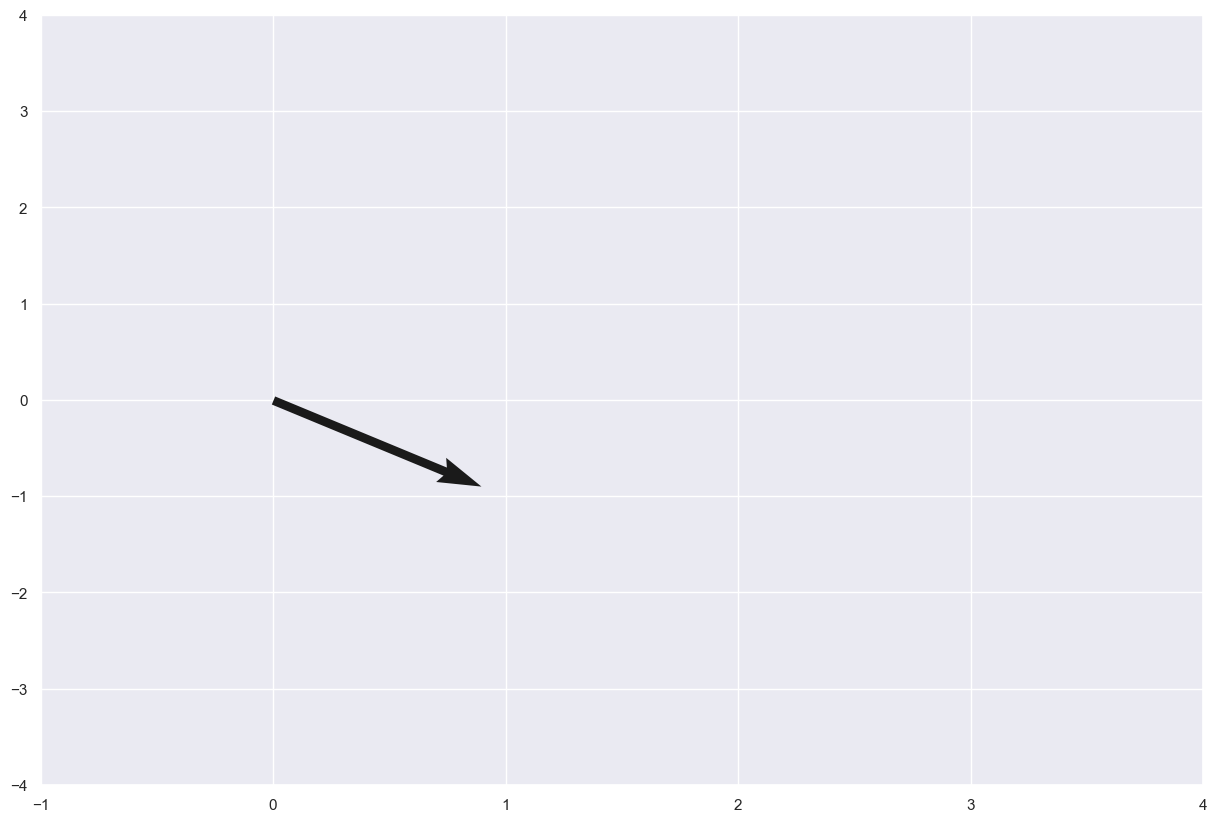

In [178]:
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1, 4)
plt.ylim(-4, 4)

(-4.0, 4.0)

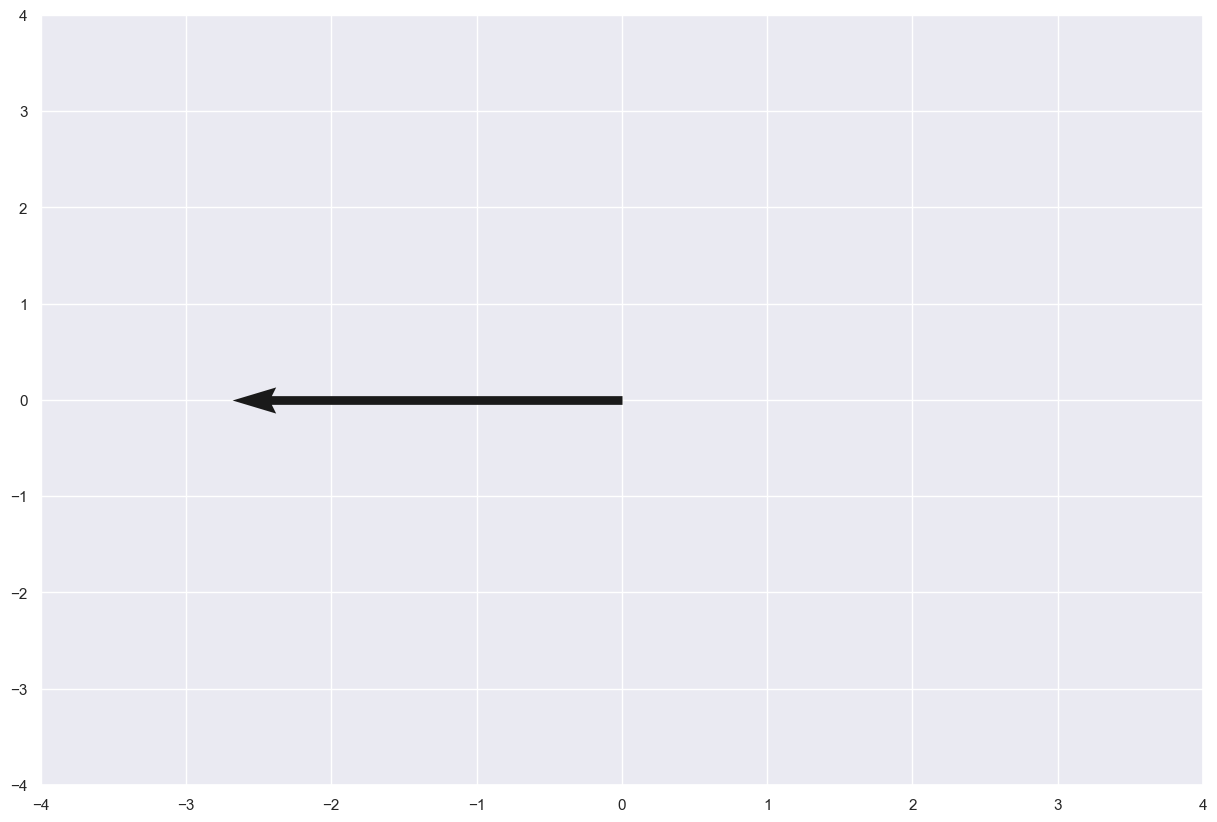

In [179]:
new_vector1 = m@vector1
plt.quiver(0, 0, (new_vector1)[0], (new_vector1)[1], angles='xy', scale_units='xy', scale=1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

Почему-то не вы глядит колинеарным ??? Может я что-то не так понял и так и сяк пытался - коллинеарность не наблюдаю

Можно еще так

In [180]:
import sympy as sym

L = sym.Symbol('L')

eq = (1-L)*(1-L)-4
eig_values= sym.solve(eq)
eig_values



[-1, 3]

Ну вектора уже сложно связать с sympy

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [181]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [182]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

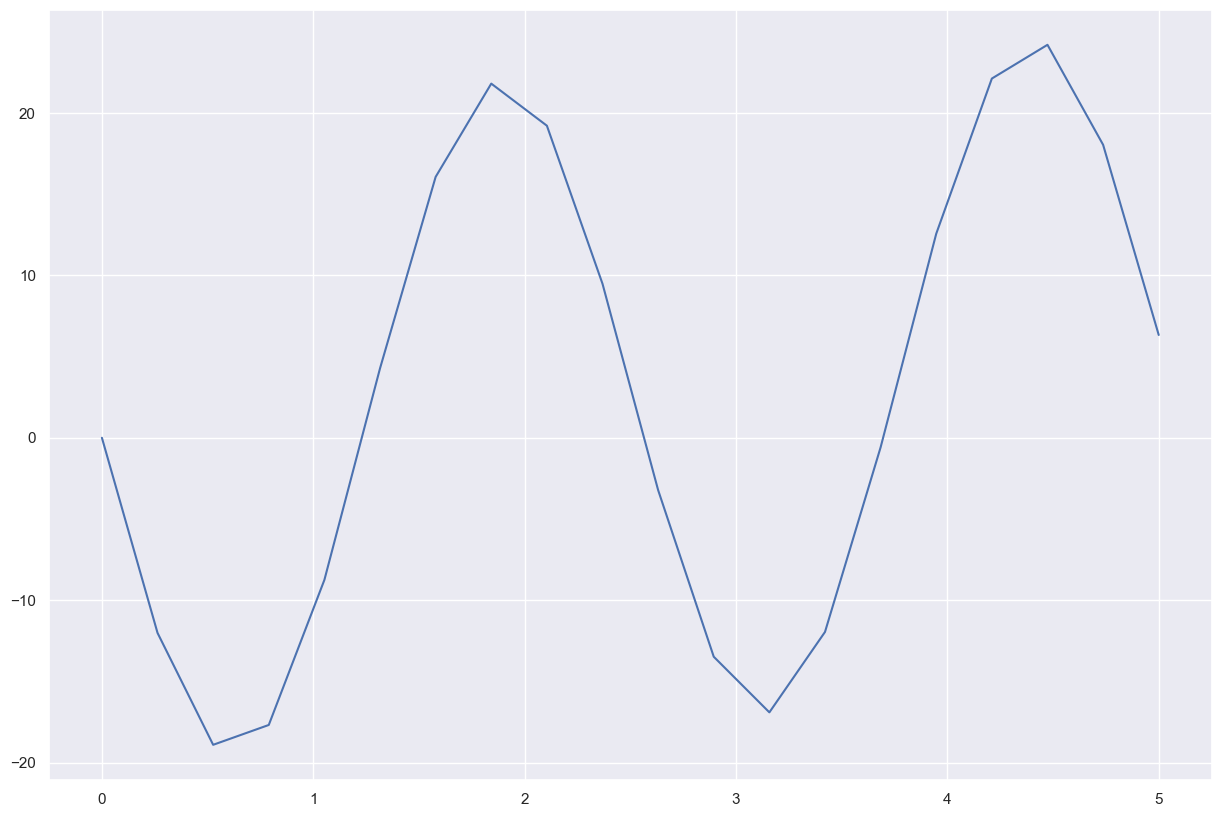

In [183]:
plt.plot(x, fx)
plt.show()

In [184]:
from scipy.optimize import curve_fit
popt, _ = curve_fit(f,x,fx)

In [185]:
popt

array([1.29675054, 3.38240803])

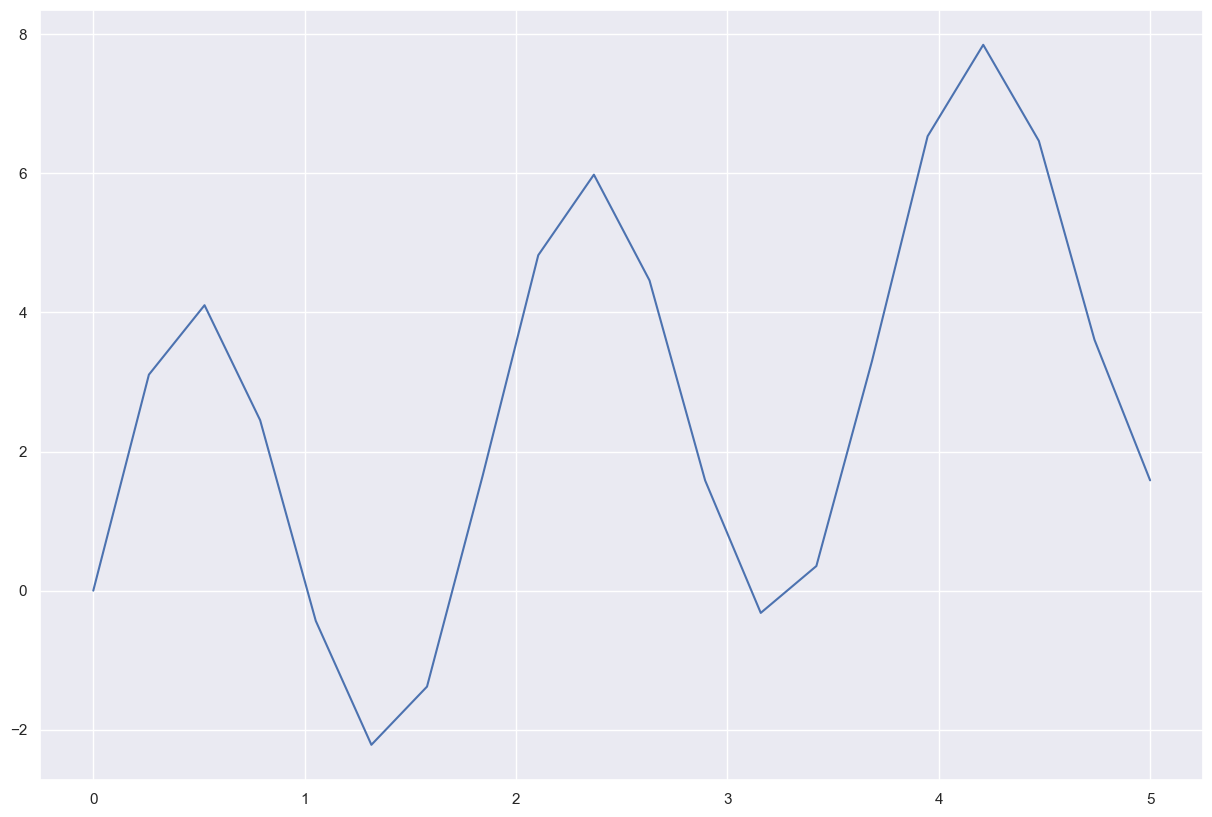

In [186]:
plt.plot(x, f(x,popt[0],popt[1]))
plt.show()

In [187]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [188]:
error(popt)

241.3737415232296

In [189]:
res = differential_evolution(error, [(x.min(),x.max()),((fx.min(),fx.max()))], seed=42)

In [190]:
res.x

array([ 3.        , 21.37610417])

In [191]:
error(res.x)

1.2918263249339645e-05

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [192]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [193]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [194]:
res = pairwise_distances(raitings, metric='cosine')
res

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [195]:
def index_finder(vector):
    min_elem = 1
    for elem in np.nonzero(vector)[0]:
        if vector[elem] < min_elem:
            min_elem = vector[elem]
            idx = elem
    return min_elem, idx

In [196]:
pairs = []
for idx,elem in enumerate(raitings):
    pairs.append((elem,raitings[index_finder(res[idx])[1]]))
    

In [197]:
for elem in pairs:
    print(elem[0])
    print(elem[1])
    print()

[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]

[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]

[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]

[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]

[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]

[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]

[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]

[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]

[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]

[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]



In [198]:
for elem in pairs:
    print(cosine_similarity(elem))
    print()

[[1.         0.91065982]
 [0.91065982 1.        ]]

[[1.         0.87138052]
 [0.87138052 1.        ]]

[[1.         0.91873051]
 [0.91873051 1.        ]]

[[1.        0.8588687]
 [0.8588687 1.       ]]

[[1.         0.87948477]
 [0.87948477 1.        ]]

[[1.         0.85514908]
 [0.85514908 1.        ]]

[[1.         0.83274211]
 [0.83274211 1.        ]]

[[1.         0.84451685]
 [0.84451685 1.        ]]

[[1.         0.91065982]
 [0.91065982 1.        ]]

[[1.         0.91873051]
 [0.91873051 1.        ]]

